In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


# Data Aggregation

In [6]:



a = pd.read_csv("/Users/poojatyagi/Documents/Documents_backup_9July/MIS 596A/Total-CSVs/l2-malicious.csv")
b = pd.read_csv("/Users/poojatyagi/Documents/Documents_backup_9July/MIS 596A/Total-CSVs/l2-benign.csv")

out = a.append(b)

with open("/Users/poojatyagi/Documents/Documents_backup_9July/MIS 596A/Total-CSVs/result.csv", 'w', encoding='utf-8') as f:
    out.to_csv(f, index=False)

# Data Preprocessing

In [9]:
# Encoding the label 
out["Label"] = np.where(out["Label"].str.contains("Malicious"), 1, 0)

In [10]:
# dropping lab specific data
out_Y=out['Label']
out_X=out.drop(columns=['Label','SourcePort','DestinationPort','SourceIP','DestinationIP','TimeStamp'],axis=1)

In [ ]:

out_X.dtypes


In [214]:
# Missing data 
out.isnull().sum()

SourceIP                                    0
DestinationIP                               0
SourcePort                                  0
DestinationPort                             0
TimeStamp                                   0
Duration                                    0
FlowBytesSent                               0
FlowSentRate                                0
FlowBytesReceived                           0
FlowReceivedRate                            0
PacketLengthVariance                        0
PacketLengthStandardDeviation               0
PacketLengthMean                            0
PacketLengthMedian                          0
PacketLengthMode                            0
PacketLengthSkewFromMedian                  0
PacketLengthSkewFromMode                    0
PacketLengthCoefficientofVariation          0
PacketTimeVariance                          0
PacketTimeStandardDeviation                 0
PacketTimeMean                              0
PacketTimeMedian                  

## Descriptive Analytics

In [149]:
# Data descriptive statistics
out.describe(exclude=[object])

SourcePort  DestinationPort       Duration  FlowBytesSent  \
count  269643.000000    269643.000000  269643.000000   2.696430e+05   
mean    38366.919152      8838.751082      53.860267   6.575789e+04   
std     19368.859799     18011.750804      45.546712   1.902025e+05   
min       443.000000       443.000000       0.000000   5.500000e+01   
25%     35236.000000       443.000000      30.090872   1.153000e+03   
50%     43948.000000       443.000000      34.063912   1.807000e+03   
75%     51950.000000       443.000000     105.743163   2.368550e+04   
max     65532.000000     65497.000000     179.021144   8.015359e+06   

       FlowSentRate  FlowBytesReceived  FlowReceivedRate  \
count  2.696430e+05       2.696430e+05      2.696430e+05   
mean   8.207421e+03       6.736263e+04      7.057454e+03   
std    1.718889e+05       1.822382e+05      1.009548e+05   
min   -1.000000e+00       0.000000e+00     -1.000000e+00   
25%    5.341205e+01       4.100000e+03      1.436472e+02   
50%    1.646758e+02       4.896000e+03      2.416428e+02   
75%    1.415331e+03       2.929600e+04      2.253600e+03   
max    2.304348e+07       7.723184e+06      7.600000e+06   

       PacketLengthVariance  PacketLengthStandardDeviation  PacketLengthMean  \
count          2.696430e+05                  269643.000000     269643.000000   
mean           1.293613e+05                     299.078175        203.355411   
std            1.405960e+05                     199.784105         76.686285   
min            0.000000e+00                       0.000000         55.000000   
25%            1.238665e+04                     111.295316        140.928571   
50%            1.266689e+05                     355.905730        223.400000   
75%            1.762639e+05                     419.837942        240.777778   
max            1.578115e+06                    1256.230616        689.800000   

       ...  PacketTimeCoefficientofVariation  ResponseTimeTimeVariance  \
count  ...                     269643.000000             269643.000000   
mean   ...                          1.092043                  1.543188   
std    ...                          0.567513                  8.623769   
min    ...                         -1.000000                 -1.000000   
25%    ...                          0.582026                  0.000052   
50%    ...                          0.888677                  0.000081   
75%    ...                          1.622284                  0.000518   
max    ...                          5.616085                647.245330   

       ResponseTimeTimeStandardDeviation  ResponseTimeTimeMean  \
count                      269643.000000         269643.000000   
mean                            0.301802              0.670105   
std                             1.206093              2.746812   
min                            -1.000000             -1.000000   
25%                             0.007215              0.010407   
50%                             0.009013              0.013542   
75%                             0.022766              0.025042   
max                            25.441017             28.017596   

       ResponseTimeTimeMedian  ResponseTimeTimeMode  \
count           269299.000000         269643.000000   
mean                 0.717219              0.372551   
std                  3.164925              2.333771   
min                  0.000002             -1.000000   
25%                  0.013382              0.000015   
50%                  0.015338              0.000027   
75%                  0.015940              0.000144   
max                 28.017596             28.017596   

       ResponseTimeTimeSkewFromMedian  ResponseTimeTimeSkewFromMode  \
count                   269299.000000                 269643.000000   
mean                        -0.442731                      0.763784   
std                          1.884229                      1.495195   
min                        -10.000000                    -10.00000

## handling Missing values

In [11]:
# Missing columns removed from data as we would not 
out_X=out_X.drop(columns=['ResponseTimeTimeMedian','ResponseTimeTimeSkewFromMedian'],axis=1)

In [12]:
out_X.dtypes


Duration                                  float64
FlowBytesSent                               int64
FlowSentRate                              float64
FlowBytesReceived                           int64
FlowReceivedRate                          float64
PacketLengthVariance                      float64
PacketLengthStandardDeviation             float64
PacketLengthMean                          float64
PacketLengthMedian                        float64
PacketLengthMode                            int64
PacketLengthSkewFromMedian                float64
PacketLengthSkewFromMode                  float64
PacketLengthCoefficientofVariation        float64
PacketTimeVariance                        float64
PacketTimeStandardDeviation               float64
PacketTimeMean                            float64
PacketTimeMedian                          float64
PacketTimeMode                            float64
PacketTimeSkewFromMedian                  float64
PacketTimeSkewFromMode                    float64


## Data Normalization

In [153]:
# normalize the data attributes
normalized_X = preprocessing.normalize(out_X)

In [154]:
normalized_X=pd.DataFrame(normalized_X,columns=out_X.columns)

In [157]:
normalized_X.reset_index(drop=True, inplace=True)
out_Y.reset_index(drop=True, inplace=True)
normalized_data=pd.concat([normalized_X,out_Y],axis=1)

#out_Y.head()

In [167]:
out_X.reset_index(drop=True, inplace=True)
non_normalized_data=pd.concat([out_X,out_Y],axis=1)

## Pearson correlation matrix with normalized data

In [159]:
corr_matrix = normalized_data.corr()


In [ ]:
## Spearman correlation matrix with non-normalized data

In [169]:
spearman_corr_matrix = non_normalized_data.corr(method='spearman')

## Pearson correlation heatmap

In [160]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

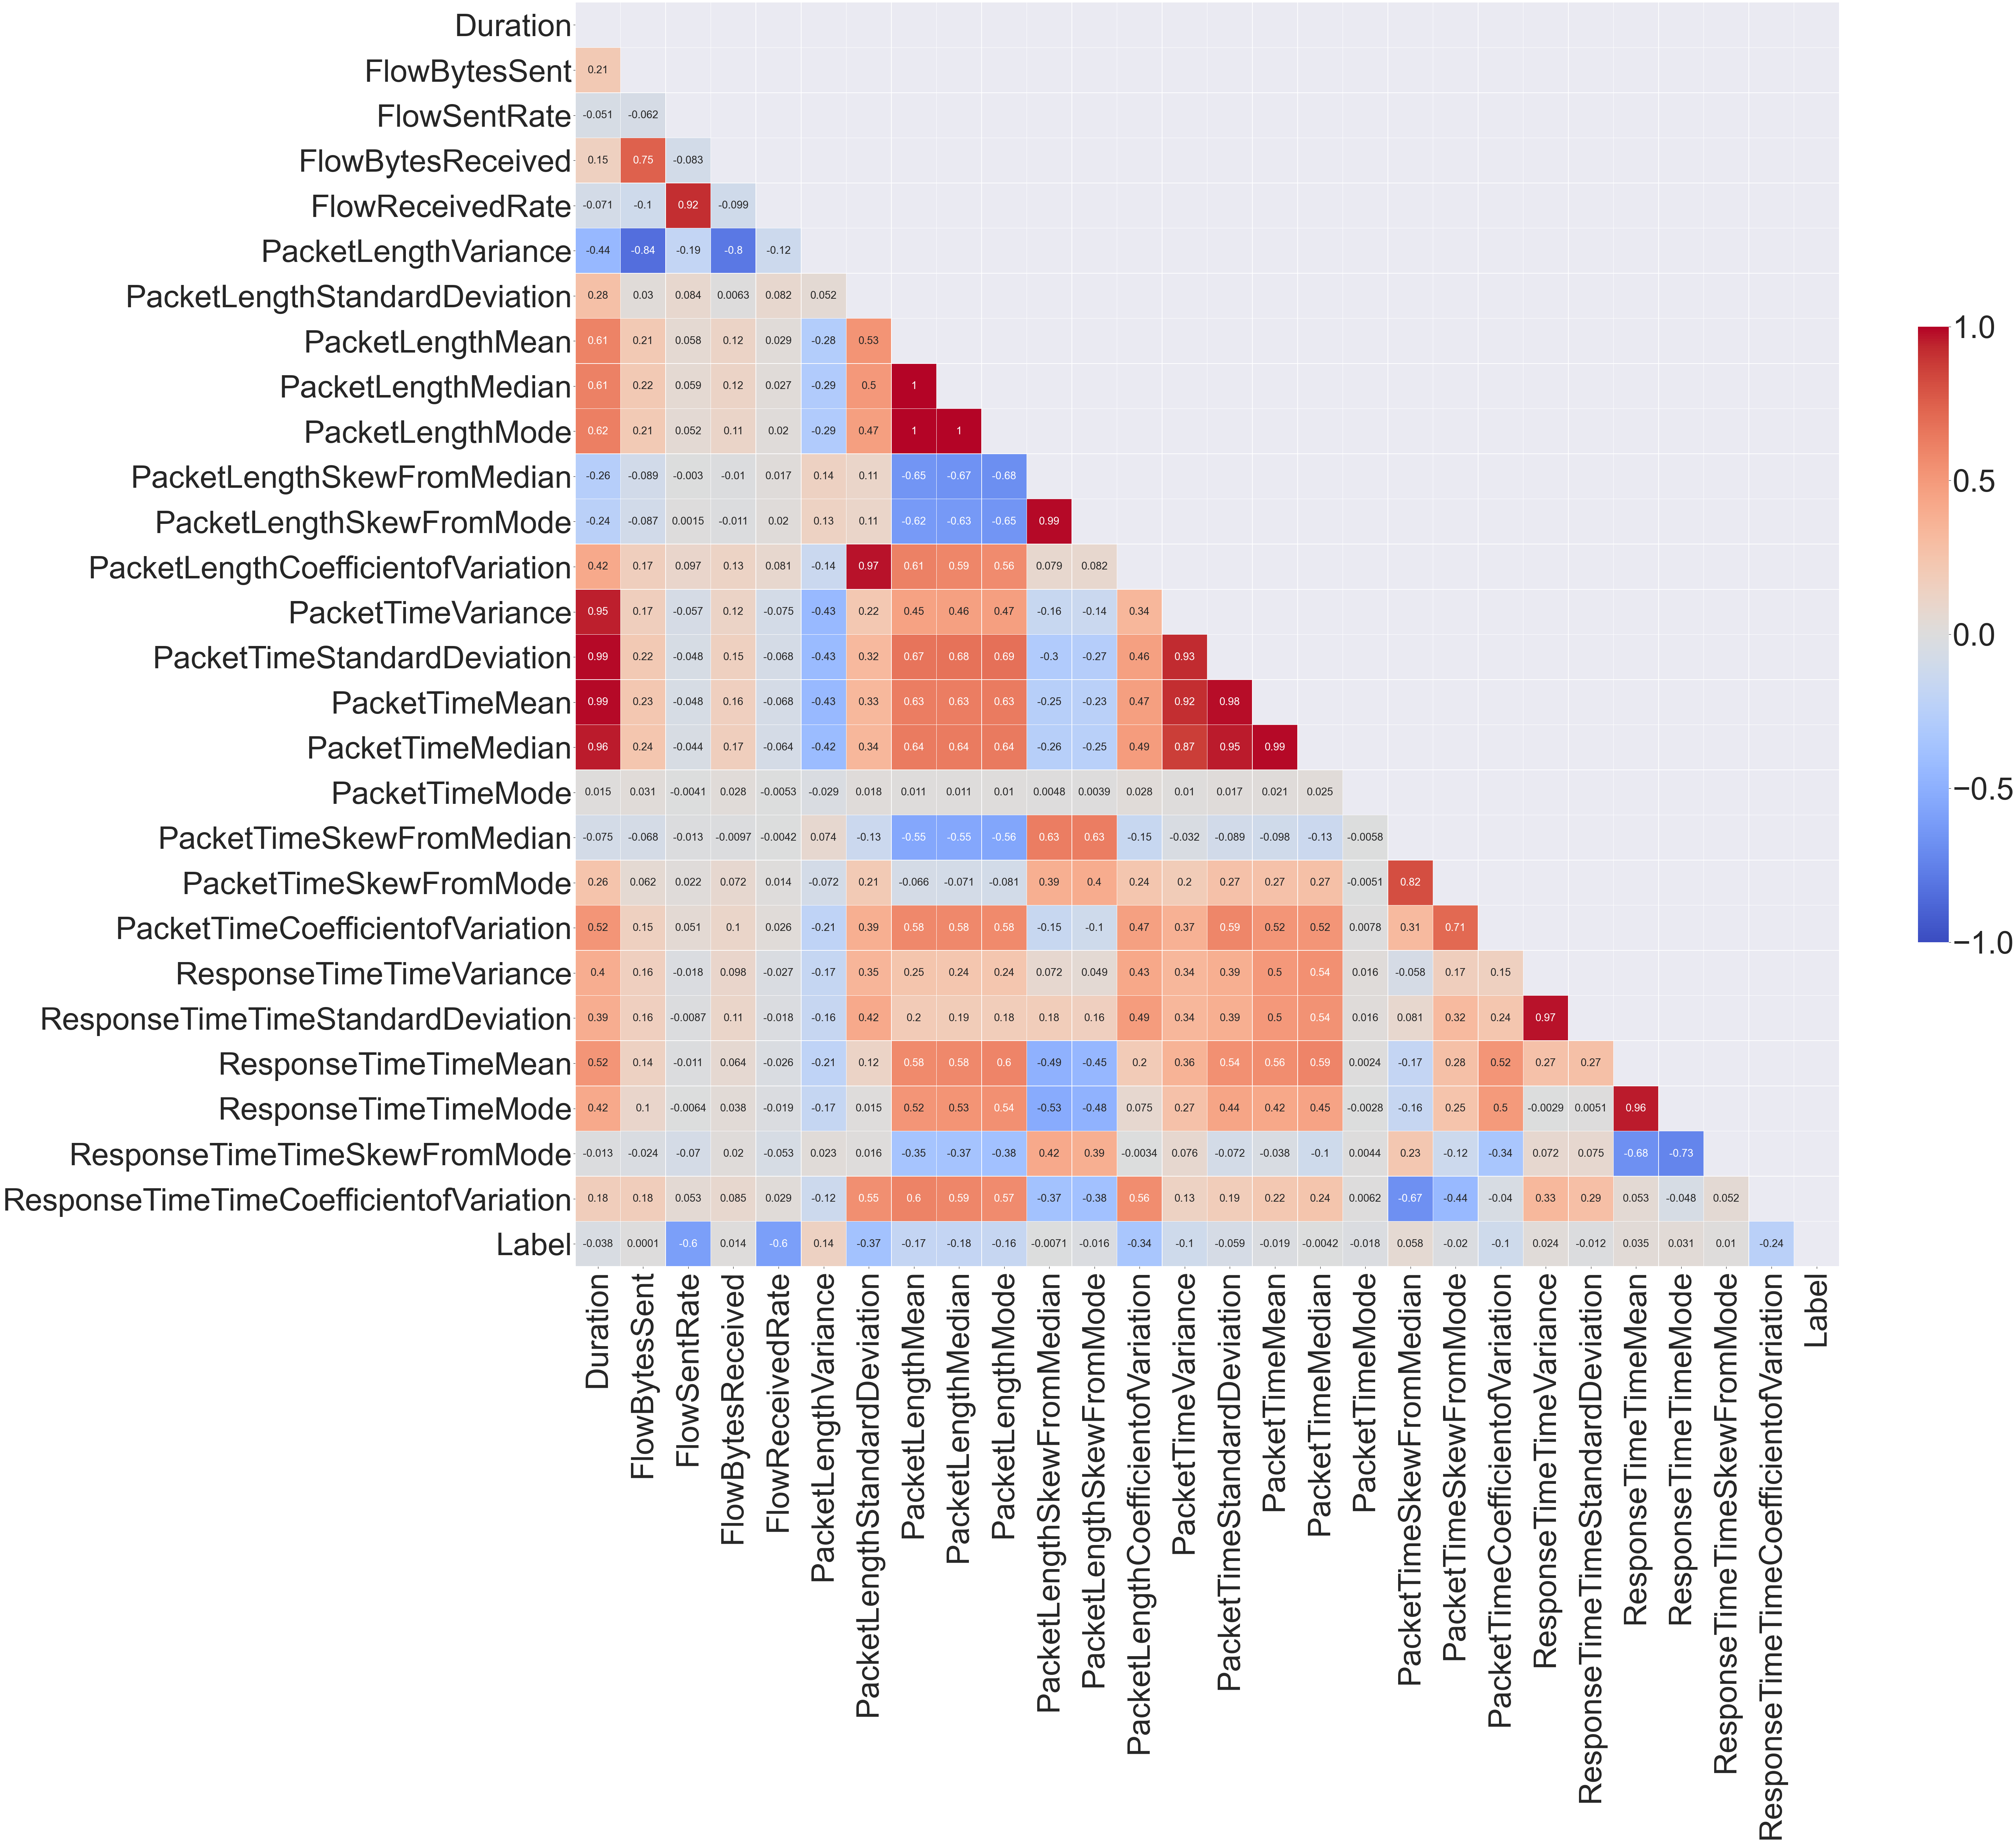

In [164]:

f, ax = plt.subplots(figsize=(80, 80)) 
sns.set(font_scale=8)
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 30})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

## Correlation with respect to label

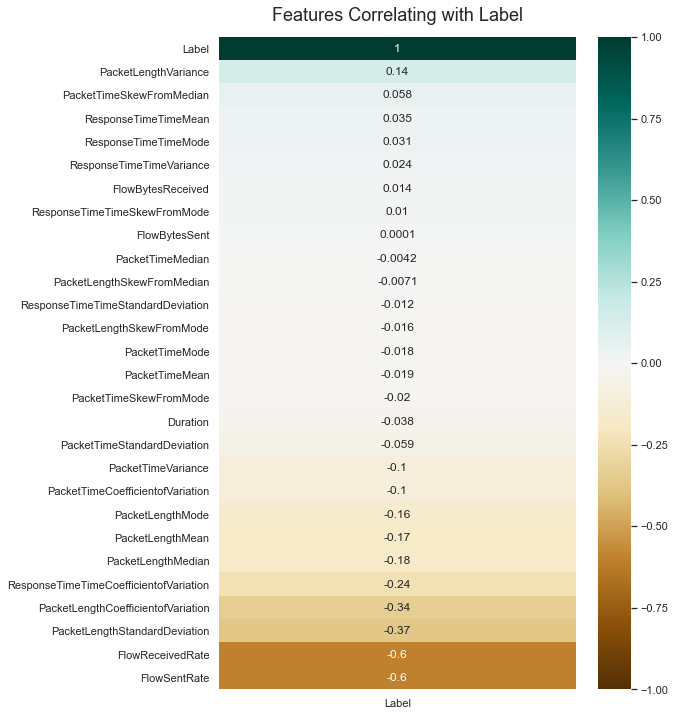

In [165]:
sns.set(font_scale=1)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(normalized_data.corr()[['Label']].sort_values(by='Label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Label', fontdict={'fontsize':18}, pad=16);












## Spearman Correlation matrix

In [170]:
mask_spearman = np.zeros_like(spearman_corr_matrix, dtype=np.bool)
mask_spearman[np.triu_indices_from(mask_spearman)]= True

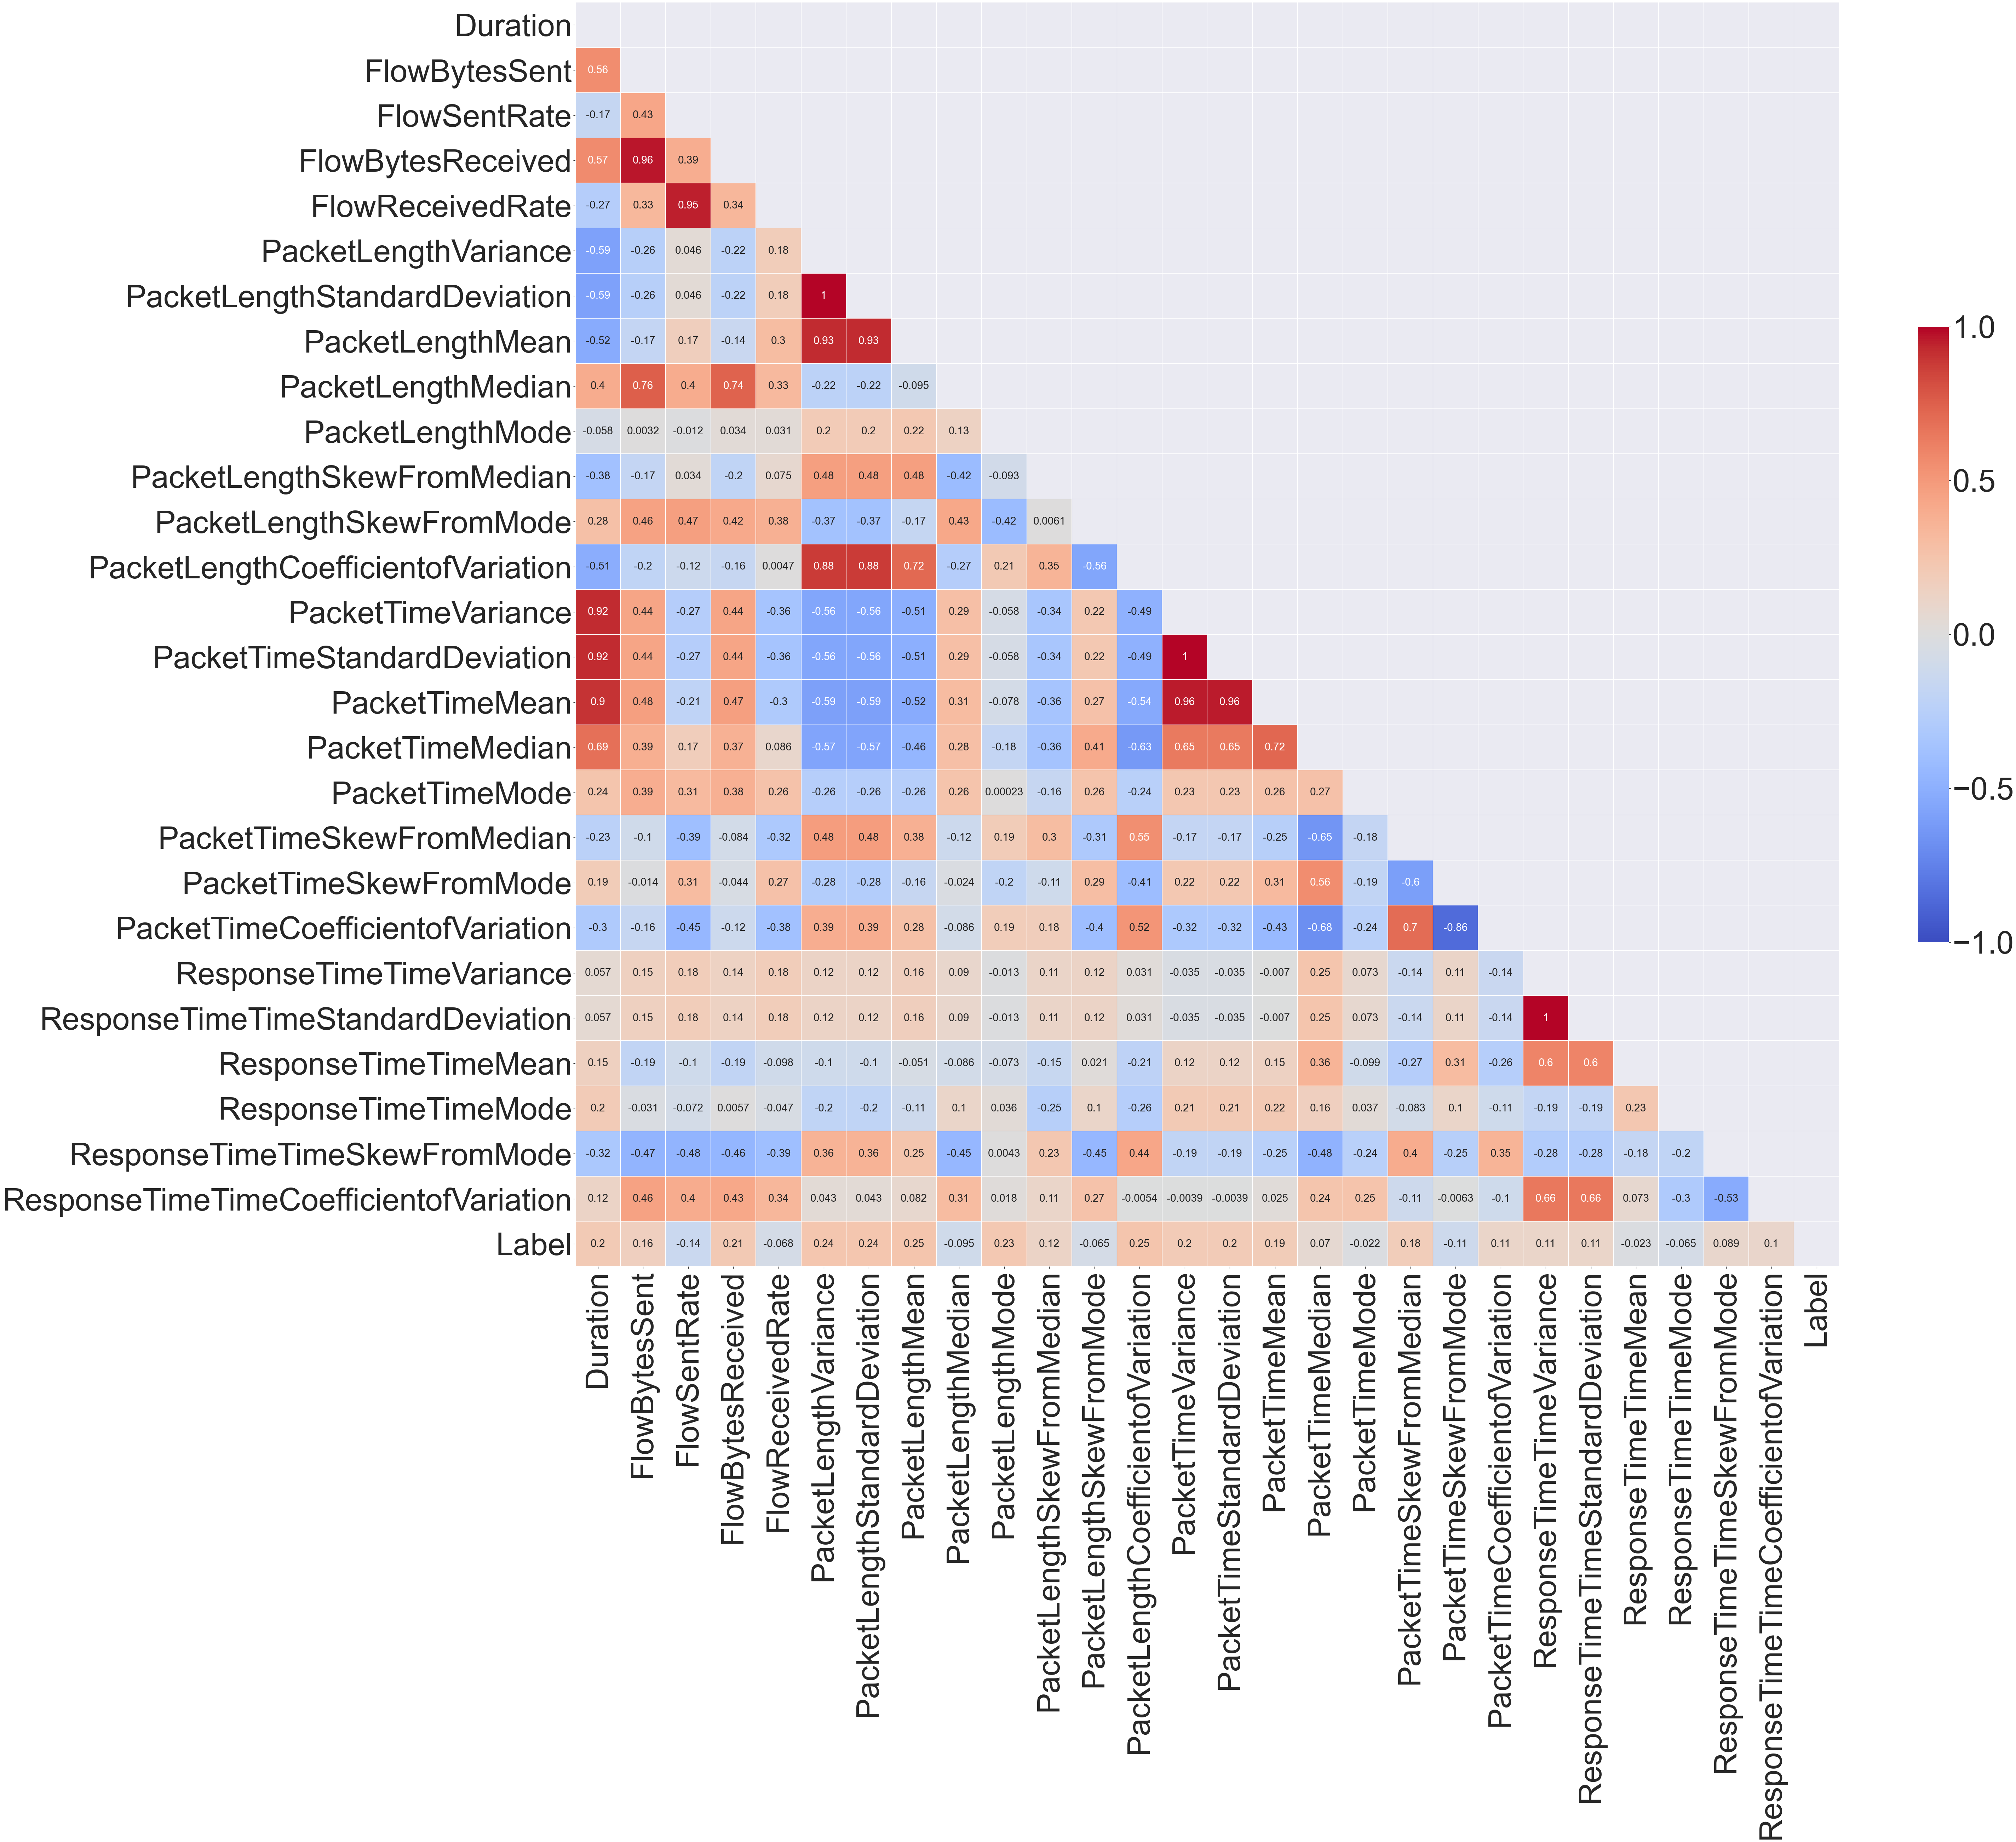

In [172]:
f, ax = plt.subplots(figsize=(80, 80)) 

heatmap = sns.heatmap(spearman_corr_matrix, 
                      mask = mask_spearman,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 30})
#add the column names as labels
ax.set_yticklabels(spearman_corr_matrix.columns, rotation = 0)
ax.set_xticklabels(spearman_corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
## Spearman correlation with respect to Label

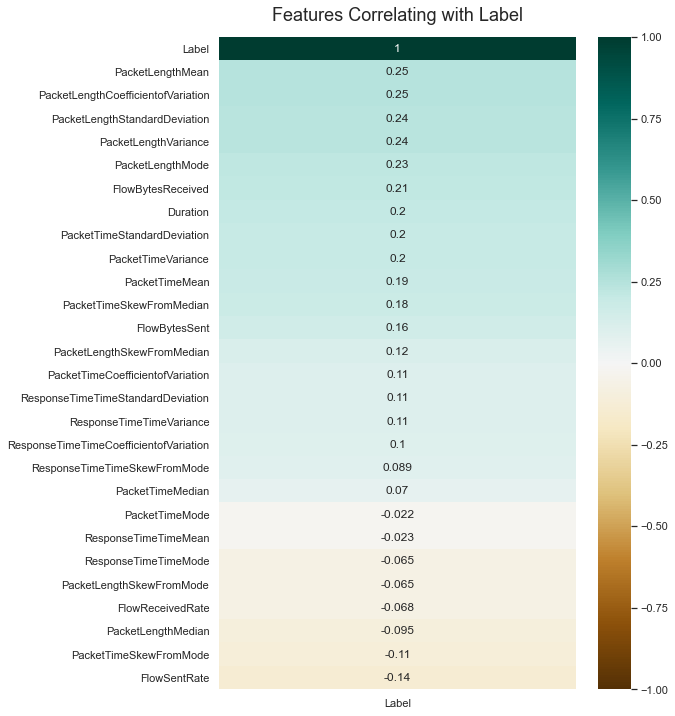

In [173]:
sns.set(font_scale=1)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(non_normalized_data.corr(method='spearman')[['Label']].sort_values(by='Label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Label', fontdict={'fontsize':18}, pad=16);


# Decision Tree Implementation - (On non-normalized data using all available features)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [176]:
X_train, X_test, y_train, y_test = train_test_split(out_X, out_Y, random_state=1)

In [177]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [182]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=7, random_state=7, shuffle=True)
scoring = 'roc_auc'
results = model_selection.cross_val_score(dt,out_X, out_Y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.999 (0.001)


In [178]:
y_pred = dt.predict(X_test)

In [180]:
traffic_type = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(traffic_type, predictions)

array([[ 4884,    17],
       [   14, 62496]])

## Decision Tree Evaluation

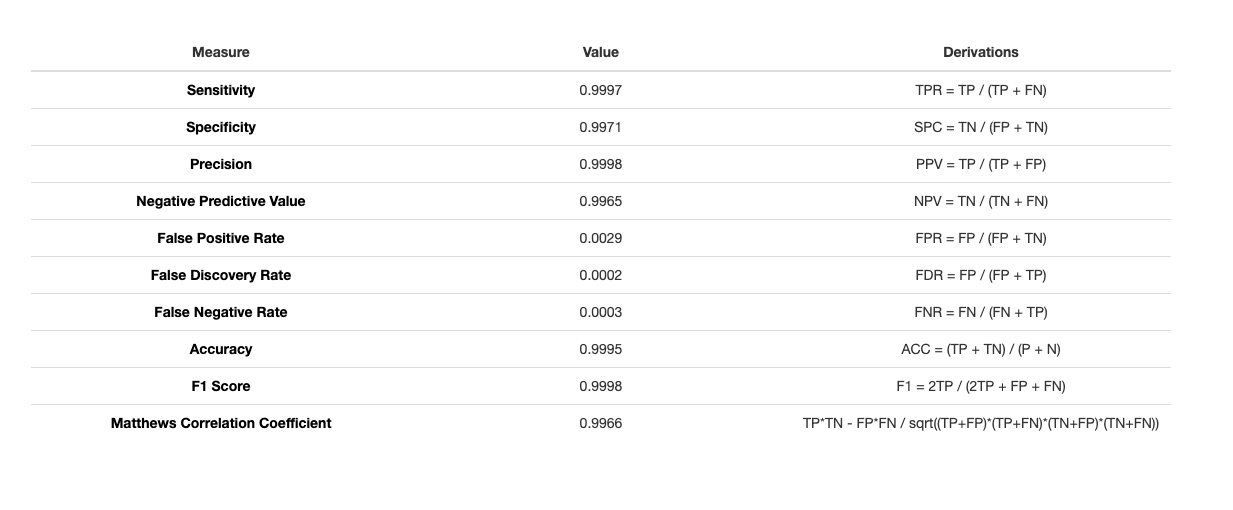

In [20]:
from sklearn.metrics import classification_report
# report = classification_report(y_test, predictions)
# print(report)

# Random Forest

In [184]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10, random_state = 1)
# Train the model on training data
rf.fit(X_train, y_train);

Feature: 0, Score: 0.03159
Feature: 1, Score: 0.05129
Feature: 2, Score: 0.08054
Feature: 3, Score: 0.05323
Feature: 4, Score: 0.02042
Feature: 5, Score: 0.05925
Feature: 6, Score: 0.02695
Feature: 7, Score: 0.03281
Feature: 8, Score: 0.07135
Feature: 9, Score: 0.19077
Feature: 10, Score: 0.01149
Feature: 11, Score: 0.02456
Feature: 12, Score: 0.02651
Feature: 13, Score: 0.06344
Feature: 14, Score: 0.07611
Feature: 15, Score: 0.04760
Feature: 16, Score: 0.06907
Feature: 17, Score: 0.00258
Feature: 18, Score: 0.01197
Feature: 19, Score: 0.00970
Feature: 20, Score: 0.00658
Feature: 21, Score: 0.00772
Feature: 22, Score: 0.00872
Feature: 23, Score: 0.00398
Feature: 24, Score: 0.00443
Feature: 25, Score: 0.00564
Feature: 26, Score: 0.00168


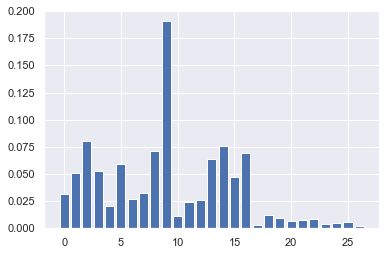

In [193]:
from matplotlib import pyplot
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [194]:
X_train.columns

Index(['Duration', 'FlowBytesSent', 'FlowSentRate', 'FlowBytesReceived',
       'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation',
       'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean',
       'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMedian',
       'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
       'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
       'ResponseTimeTimeMean', 'ResponseTimeTimeMode',
       'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation'],
      dtype='object')

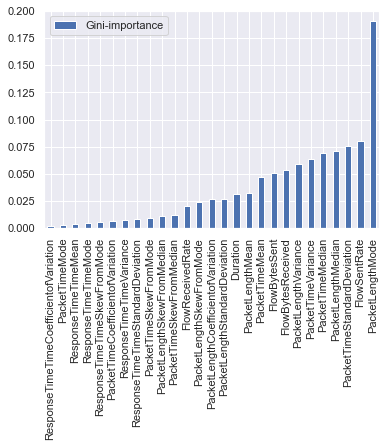

In [196]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)

Feature: 0, Score: 0.00430
Feature: 1, Score: 0.00022
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.24326
Feature: 4, Score: 0.04129
Feature: 5, Score: 0.00093
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00012
Feature: 8, Score: 0.21757
Feature: 9, Score: 0.20951
Feature: 10, Score: 0.00080
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.01356
Feature: 13, Score: 0.00056
Feature: 14, Score: 0.00138
Feature: 15, Score: 0.25280
Feature: 16, Score: 0.00729
Feature: 17, Score: 0.00018
Feature: 18, Score: 0.00095
Feature: 19, Score: 0.00006
Feature: 20, Score: 0.00087
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00007
Feature: 23, Score: 0.00101
Feature: 24, Score: 0.00294
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00030


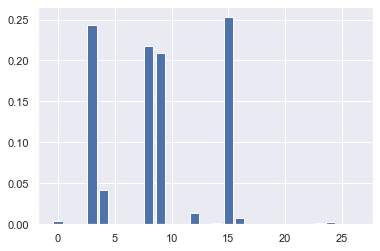

In [197]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## SMOTE oversampling technique

In [199]:
from imblearn.over_sampling import SMOTE
import numpy as np
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print (y_train.value_counts() , np.bincount(y_train_res))

1    187326
0     14906
Name: Label, dtype: int64 [187326 187326]


## random forest with SMOTE oversampling

In [200]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train_res , y_train_res)
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

   Malicious       1.00      1.00      1.00      4901
      Benign       1.00      1.00      1.00     62510

    accuracy                           1.00     67411
   macro avg       1.00      1.00      1.00     67411
weighted avg       1.00      1.00      1.00     67411



In [201]:
target_names = ['Benign', 'Malicious']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4901
   Malicious       1.00      1.00      1.00     62510

    accuracy                           1.00     67411
   macro avg       1.00      1.00      1.00     67411
weighted avg       1.00      1.00      1.00     67411



In [202]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier

# # define model
# model = BalancedRandomForestClassifier(n_estimators=10)
# # define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, out_X, out_Y, scoring='roc_auc', cv=cv, n_jobs=-1)
# # summarize performance
# print('Mean ROC AUC: %.3f' % mean(scores))


Mean ROC AUC: 1.000


In [16]:
X_train, X_test, y_train, y_test = train_test_split(out_X, out_Y, random_state=1)

In [17]:
y_test.value_counts()

1    62510
0     4901
Name: Label, dtype: int64

## Random Forest with non-optimized parameters

In [ ]:
# define model

clf = RandomForestClassifier(random_state=1, n_jobs=-1, class_weight="balanced" )


In [222]:
model= clf.fit(X_train,y_train)

In [224]:
target_names = ['Benign', 'Malicious']
print(classification_report(y_test, model.predict(X_test),target_names=target_names))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      4901
   Malicious       1.00      1.00      1.00     62510

    accuracy                           1.00     67411
   macro avg       1.00      1.00      1.00     67411
weighted avg       1.00      1.00      1.00     67411



In [26]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

## Hyperparameter Tuning for random forest

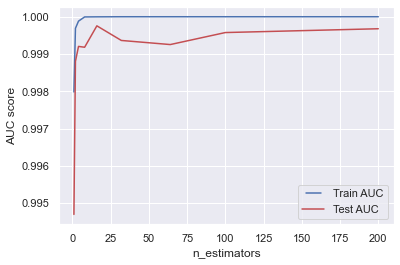

In [229]:
from sklearn.metrics import roc_curve, auc
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
#n_estimators = 16

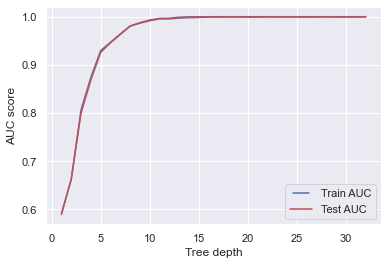

In [231]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
#max_depths = 7 or 8

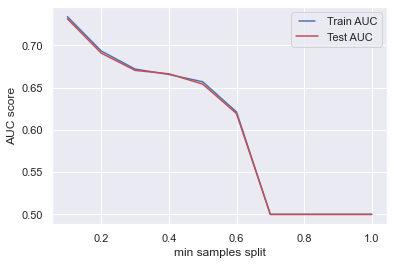

In [232]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [ ]:
#min_samples_split =0.1

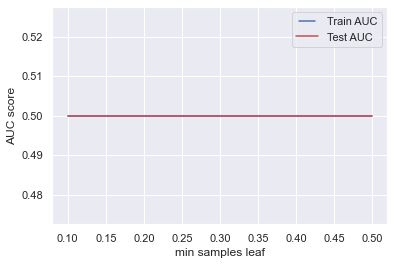

In [233]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [ ]:
#min_sample=0.1

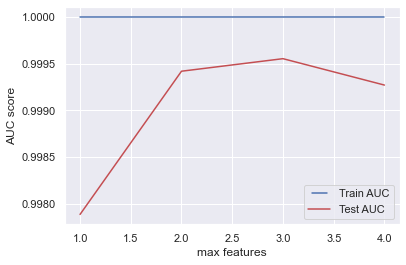

In [236]:
max_features = list(range(1, 5))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [ ]:
#max_features=3

## Model with optimized features

In [21]:
from imblearn.ensemble import BalancedRandomForestClassifier
rf= BalancedRandomForestClassifier(max_features=3,min_samples_leaf=0.1,min_samples_split=0.1,max_depth=7, n_estimators=16)
rf.fit(X_train, y_train)
target_names = ['Benign', 'Malicious']
print(classification_report(y_test, rf.predict(X_test),target_names=target_names))


              precision    recall  f1-score   support

      Benign       0.44      0.84      0.57      4901
   Malicious       0.99      0.91      0.95     62510

    accuracy                           0.91     67411
   macro avg       0.71      0.88      0.76     67411
weighted avg       0.95      0.91      0.92     67411



In [251]:
y_train.shape

(202232,)

In [24]:
confusion_matrix(y_test, rf.predict(X_test))

array([[ 4099,   802],
       [ 5316, 57194]])

In [27]:
train_pred = rf.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ("train data ROC_AUC")
print (roc_auc)

    
y_pred = rf.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ("test data ROC_AUC")
print (roc_auc)
    

train data ROC_AUC
0.8801469080897304
test data ROC_AUC
0.8756587666642589


## ROC Curve

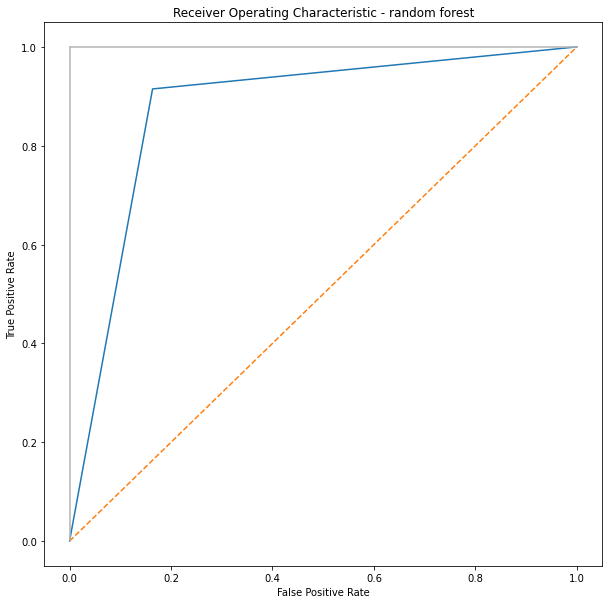

In [28]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - random forest')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## random Forest Based Feature importance

No handles with labels found to put in legend.


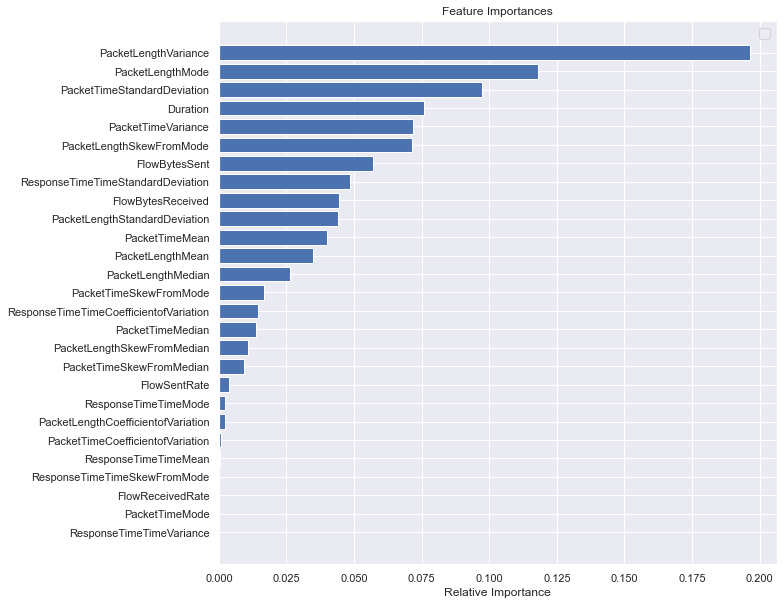

In [243]:
features = out_X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
f, ax = plt.subplots(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
#ax.legend(fontsize = 14)
plt.show()